In [99]:
import json
from functools import reduce
from statistics import mean

In [100]:
with open('repoToSteps.json') as repoToSteps:
    repoToStepsCWL = {
        repo: list(filter(lambda step: '.cwl' in step, steps))
        for repo, steps in json.loads(repoToSteps.read()).items()
    }

In [101]:
with open('phenotypeGroups.json') as phenotypeGroups:
    phenotypeGroups = json.loads(phenotypeGroups.read())

In [102]:
with open('intersections.json') as intersections:
    intersections = json.loads(intersections.read())

In [103]:
print('\nTotal definitions: ' + str(len(repoToStepsCWL.keys())))


Total definitions: 1171


In [104]:
conditionGroups = phenotypeGroups.keys()
print('\nCondition groups: ' + str(len(conditionGroups)))
groupedConditions = list(phenotypeGroups.keys()) + [
    json.dumps(item) for sublist in phenotypeGroups.values() for item in sublist
]
print('\nGrouped conditions: ' + str(len(groupedConditions)))
ungroupedConditions = [
    repo for repo in repoToStepsCWL.keys() if repo not in groupedConditions
]
print('\nUngrouped conditions: ' + str(len(ungroupedConditions)))
print('\nUnique conditions: ' + str(len(conditionGroups) + len(ungroupedConditions)))


Condition groups: 180

Grouped conditions: 706

Ungrouped conditions: 542

Unique conditions: 722


In [105]:
print(
    '\nProportion of conditions grouped: '
    + str(round(len(groupedConditions) / len(repoToStepsCWL.keys()) * 100, 2))
    + '%'
)
print(
    '\nDefinitions per condition: '
    + str(
        len(repoToStepsCWL.keys()) / (len(conditionGroups) + len(ungroupedConditions))
    )
)


Proportion of conditions grouped: 60.29%

Definitions per condition: 1.6218836565096952


In [106]:
sortedConditionGroups = sorted(
    [
        (leadCondition, len(otherConditions) + 1)
        for leadCondition, otherConditions in phenotypeGroups.items()
    ],
    key=lambda conditionGroupEntry: conditionGroupEntry[1],
    reverse=True,
)
largestConditionGroup = sortedConditionGroups[0]
print('\nLargest condition group: ' + str(largestConditionGroup))
print(phenotypeGroups[largestConditionGroup[0]])


Largest condition group: ('{"\\"name\\"": "Diabetes---d88be170-16f1-11ef-9de4-4d4ea830ad16", "\\"about\\"": "Diabetes - PH8"}', 45)
[{'"name"': 'Diabetes---4ce31400-16fa-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH24'}, {'"name"': 'Diabetes---a1f20850-1779-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH152'}, {'"name"': 'Diabetes-Medication---3541e3f0-1847-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes Medication - PH374'}, {'"name"': 'Diabetes---87522990-184a-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH375'}, {'"name"': 'Diabetes---c10cdf70-19eb-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH518'}, {'"name"': 'Diabetes---f3206ee0-19ec-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH519'}, {'"name"': 'Diabetes---b8c00ec0-19ee-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH520'}, {'"name"': 'Diabetes---e53eb430-1a37-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH580'}, {'"name"': 'Diabetes---1d8a7370-1aaa-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH618'},

In [107]:
def getIntersectingConditions(conditionGroup):
    return set(
        map(
            lambda repo: repo['"name"'],
            reduce(
                lambda allConditionsWithIntersection, conditionsWithIntersection: allConditionsWithIntersection
                + json.loads(conditionsWithIntersection),
                list(intersections[conditionGroup[0]].keys()),
                [],
            ),
        )
    )


intersectingConditions = getIntersectingConditions(largestConditionGroup)
print(
    '\nIntersecting conditions in largest condition group: '
    + str(intersectingConditions)
)
print(
    '\nNumber of intersection conditions in largest condition group: '
    + str(len(intersectingConditions))
)


Intersecting conditions in largest condition group: {'Gpl1---8c5dc720-19f6-11ef-9de4-4d4ea830ad16', 'Sulfonylureas---0674d630-1c26-11ef-bdee-f10829e63eeb', 'Diabetes-Elixhauser-primary-care---398956f0-1e00-11ef-94c0-09c4aef33dd3', 'CCU002_02-Diabetes---32f22c50-2273-11ef-ba9f-3d1e4076db47', 'Diabetes---c10cdf70-19eb-11ef-9de4-4d4ea830ad16', 'Dpp4---09d1dab0-19f3-11ef-9de4-4d4ea830ad16', 'Diabetes-Medication---3541e3f0-1847-11ef-9de4-4d4ea830ad16', 'Sglt-2Inhibitors---922c6c80-1c24-11ef-bdee-f10829e63eeb', 'Diabetes---94b07310-1d47-11ef-94c0-09c4aef33dd3', 'Glp-1Receptoragonists---20f140a0-1c14-11ef-bdee-f10829e63eeb', 'Anti-Diabetics---89b99330-1d59-11ef-94c0-09c4aef33dd3', 'Metformin---6da8b740-1cd5-11ef-bdee-f10829e63eeb', 'Diabetes---4d9cec30-1d9f-11ef-94c0-09c4aef33dd3', 'Diabetes---cd970470-1ad4-11ef-9de4-4d4ea830ad16', 'Diabetes---e53eb430-1a37-11ef-9de4-4d4ea830ad16', 'Diabetes---f3206ee0-19ec-11ef-9de4-4d4ea830ad16', 'Diabetes---87522990-184a-11ef-9de4-4d4ea830ad16', 'Diabetes

In [108]:
from util import filterFirstOccurrences

overlapNumbers = list(
    map(
        lambda conditionsToIntersectionSteps: {
            'conditions': json.loads(conditionsToIntersectionSteps[0]),
            'intersecting': len(
                filterFirstOccurrences(conditionsToIntersectionSteps[1])
            ),
        },
        intersections[largestConditionGroup[0]].items(),
    )
)

In [109]:
mostIntersectingSteps = max(
    overlapNumbers,
    key=lambda overlapNumbersEntry: overlapNumbersEntry['intersecting'],
)

In [110]:
print(
    '\nDefinition pair with most intersecting steps in largest condition group + number of intersecting (+ number of steps (% of intersecting) in respective workflows): '
    + str(mostIntersectingSteps)
    + ' -- '
    + str(len(repoToStepsCWL[json.dumps(mostIntersectingSteps['conditions'][0])]))
    + ' ('
    + str(
        round(
            mostIntersectingSteps['intersecting']
            / len(repoToStepsCWL[json.dumps(mostIntersectingSteps['conditions'][0])])
            * 100,
            2,
        )
    )
    + '%) '
    + str(len(repoToStepsCWL[json.dumps(mostIntersectingSteps['conditions'][1])]))
    + ' ('
    + str(
        round(
            mostIntersectingSteps['intersecting']
            / len(repoToStepsCWL[json.dumps(mostIntersectingSteps['conditions'][1])])
            * 100,
            2,
        )
    )
    + '%)'
)


Definition pair with most intersecting steps in largest condition group + number of intersecting (+ number of steps (% of intersecting) in respective workflows): {'conditions': [{'"name"': 'CCU000-Diabetes---01d2fd40-1db7-11ef-94c0-09c4aef33dd3', '"about"': 'CCU000 Diabetes - PH945'}, {'"name"': 'CCU002_01-Diabetes-and-diabates-medication---a80de070-2204-11ef-ba9f-3d1e4076db47', '"about"': 'CCU002_01 Diabetes and diabates medication - PH965'}], 'intersecting': 86} -- 95 (90.53%) 95 (90.53%)


In [111]:
print('\nIntersecting steps:')
for line in intersections[largestConditionGroup[0]][
    json.dumps(mostIntersectingSteps['conditions'])
]:
    print(line)


Intersecting steps:
['retinal-ccu000-diabetes---secondary.cwl', 'renal-ccu002_01-diabetes-and-diabates-medication---primary.cwl']
['neurological-ccu000-diabetes---secondary.cwl', 'neurologic-ccu002_01-diabetes-and-diabates-medication---primary.cwl']
['ccu000-diabetes-leprechaunism---secondary.cwl', 'ccu002_01-diabetes-and-diabates-medication-leprechaunism---primary.cwl']
['stable-ccu000-diabetes---secondary.cwl', 'stable-ccu002_01-diabetes-and-diabates-medication---primary.cwl']
['ccu000-diabetes-vessel---secondary.cwl', 'ccu002_01-diabetes-and-diabates-medication-vessel---primary.cwl']
['ccu000-diabetes-education---secondary.cwl', 'ccu002_01-diabetes-and-diabates-medication-education---primary.cwl']
['neuropathic-ccu000-diabetes---secondary.cwl', 'neuropathic-ccu002_01-diabetes-and-diabates-medication---primary.cwl']
['peripheral-ccu000-diabetes---secondary.cwl', 'peripheral-ccu002_01-diabetes-and-diabates-medication---primary.cwl']
['ccu000-diabetes-treated---secondary.cwl', 'ccu002

In [112]:
leastIntersectingSteps = min(
    overlapNumbers,
    key=lambda overlapNumbersEntry: overlapNumbersEntry['intersecting'],
)

In [113]:
print('\nLeast intersecting steps: ' + str(leastIntersectingSteps))


Least intersecting steps: {'conditions': [{'"name"': 'Diabetes---d88be170-16f1-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH8'}, {'"name"': 'Diabetes---a1f20850-1779-11ef-9de4-4d4ea830ad16', '"about"': 'Diabetes - PH152'}], 'intersecting': 1}


In [114]:
averageIntersectingSteps = round(
    mean(list(map(lambda overlap: overlap['intersecting'], overlapNumbers))), 2
)

In [115]:
stepLengthsInLargestGroup = [
    (
        len(repoToStepsCWL[largestGroupPhenotype])
        if isinstance(largestGroupPhenotype, str)
        else len(repoToStepsCWL[json.dumps(largestGroupPhenotype)])
    )
    for largestGroupPhenotype in (
        [largestConditionGroup[0]] + phenotypeGroups[largestConditionGroup[0]]
    )
]
print('\nStep lengths in largest group: ' + str(sorted(stepLengthsInLargestGroup)))
print(
    '\nAverage intersecting steps (+ average number of steps (% of intersecting)): '
    + str(int(averageIntersectingSteps))
    + ' ('
    + str(int(mean(stepLengthsInLargestGroup)))
    + ' ('
    + str(
        round(
            int(averageIntersectingSteps) / int(mean(stepLengthsInLargestGroup)) * 100,
            2,
        )
    )
    + '%)'
    + ')'
)


Step lengths in largest group: [1, 2, 2, 3, 3, 4, 4, 4, 6, 8, 11, 15, 19, 20, 22, 25, 28, 28, 29, 30, 31, 32, 32, 33, 38, 41, 41, 41, 42, 45, 57, 62, 68, 75, 79, 81, 86, 86, 89, 90, 95, 95, 95, 95, 124]

Average intersecting steps (+ average number of steps (% of intersecting)): 7 (42 (16.67%))


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def plotIntersectionInLargestGroups():
    frame = pd.DataFrame(
        [
            [
                str(' '.join(json.loads(key)['"name"'].split('---')[0].split('-'))),
                len(getIntersectingConditions([key, value])),
                value - len(getIntersectingConditions([key, value])),
            ]
            for key, value in list(reversed(sortedConditionGroups[:10]))
        ],
        columns=['Condition Group', 'Intersecting', 'Distinct'],
    )
    frame.plot(x='Condition Group', kind='barh', stacked=True, mark_right=True)
    frameTotal = frame['Intersecting'] + frame['Distinct']
    frameProportions = frame[frame.columns[1:]].div(frameTotal, 0) * 100
    for column in frameProportions:
        for y, (sumWithPrecedingColumns, originalFrameValue, proportion) in enumerate(
            zip(
                frame.iloc[:, 1:].cumsum(1)[column],
                frame[column],
                frameProportions[column],
            )
        ):
            plt.text(
                sumWithPrecedingColumns - (originalFrameValue / 2),
                y,
                str(np.round(proportion, 1)) + '%',
                va='center',
                ha='center',
            )

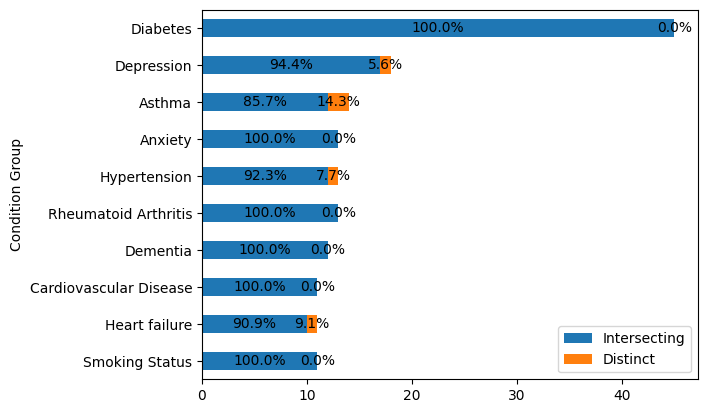

In [117]:
%matplotlib inline
plotIntersectionInLargestGroups()

In [118]:
import matplotlib

matplotlib.use("pgf")
plotIntersectionInLargestGroups()
plt.tight_layout()
plt.savefig('../charts/intersection-in-largest-groups.pgf')